# Proyek Analisis Data: Nama dataset
- Nama: Susi Setianingsih
- Email: susisetia542@gmail.com
- Id Dicoding: 489849

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Musim apa yang paling banyak rental sepeda?
- pertanyaan 2 : Bagaimana performa rental sepeda pada hari libur dan hari kerja?
- pertanyaan 3 : Berapa perbandingan jumlah rental dari casual users dan registered users di tahun 2011 dan 2012?
- pertanyaan 4 : Di hari apa jumlah sepeda paling banyak dirental?
- pertanyaan 5 : Di jam berapakah sepeda paling banyak dan paling sedikit dirental?
- pertanyaan 6 : Bagaimana pengaruh suhu terhadap jumlah rental sepeda?
- pertanyaan 7 : Bagaimana pengaruh kelembapan terhadap jumlah rental sepeda?
- pertanyaan 8 : Bagaimana pengaruh kecepatan angin terhadap jumlah rental sepeda?

## Menyiapkan semua library yang dibuthkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data
Gathering data: proses pengumpulan data

data rental perjam

In [61]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
Assesing data: penilaian kualitas dan struktur dari data

Tabel hour

In [66]:
# cek tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [67]:
# cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [68]:
# cek duplikasi data
print("Jumlah duplikasi", hour_df.duplicated().sum())

Jumlah duplikasi 0


In [69]:
# cek deskripsi statistik data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data
Cleaning data: proses pembersihan data

Tabel hour

In [72]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [73]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [77]:
hour_df.describe(include="all")

C:\Users\ACER\AppData\Local\Temp\ipykernel_13948\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [18]:
hour_df.describe(include="all")

C:\Users\ACER\AppData\Local\Temp\ipykernel_13948\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Melihat banyaknya user yang rental untuk setiap musim

In [76]:
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Melihat banyaknya user yang rental sepeda per tahun 2011 dan 2012

In [78]:
hour_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


Melihat banyaknya user yang rental setiap bulannya

In [79]:
hour_df.groupby(by='mnth').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


In [80]:
hour_df.groupby(by=['yr','mnth']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

casual  registered     cnt
yr mnth                            
1  9      43778      174795  218573
   8      43197      171306  214503
   7      41705      161902  203607
   6      43294      159536  202830
   10     34538      164303  198841
   5      44235      151630  195865
   4      38456      135768  174224
   3      31618      133257  164875
   11     21009      131655  152664
0  6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   5      31050      104771  135821
   9      26545      100873  127418
1  12     13245      110468  123713
0  10     25222       98289  123511
1  2       8721       94416  103137
0  11     15594       86573  102167
1  1       8969       87775   96744
0  4      22346       72524   94870
   12      8448       78875   87323
   3      12826       51219   64045
   2       6242       41973   48215
   1       3073       35116   38189

Melihat banyaknya rental sepeda dihari libur

In [81]:
hour_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


Melihat banyaknya rental sepeda setiap harinya dalam seminggu

In [82]:
hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


In [84]:
hour_df.groupby(by="weekday").agg({
    "casual": ["min", "max"],
    "registered": ["min", "max"]
})

casual      registered     
           min  max        min  max
weekday                            
0            0  317          0  526
1            0  272          0  857
2            0  178          0  871
3            0  237          0  886
4            0  154          0  885
5            0  264          0  757
6            0  367          0  491

Melihat banyaknya rental dihari kerja

In [86]:
hour_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Melihat banyaknya rental sepeda untuk setiap kondisi cuaca

In [88]:
hour_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


Melihat jumlah rental sepeda tertinggi dan terendah berdasarkan suhu

In [89]:
# Tertinggi
hour_df.groupby(by="temp").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

,casual,registered,cnt
temp,,,
0.70,37087,140211,177298
0.72,39157,124292,163449
0.74,38393,123194,161587
0.66,32786,123418,156204
0.64,32758,122227,154985


In [90]:
# Terendah
hour_df.groupby(by="temp").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=True).head()

,casual,registered,cnt
temp,,,
1.00,102,192,294
0.08,33,447,480
0.98,82,457,539
0.04,28,542,570
0.06,44,628,672


Melihat jumlah rental sepeda terbanyak berdasarkan feeling temperature

In [91]:
hour_df.groupby(by="atemp").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

,casual,registered,cnt
atemp,,,
0.6212,74160,237299,311459
0.6515,39302,123695,162997
0.6667,31882,123852,155734
0.6061,25146,104004,129150
0.6970,30285,97323,127608


Melihat jumlah rental sepeda terbanyak berdasarkan kelembapan

In [92]:
hour_df.groupby(by="hum").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

,casual,registered,cnt
hum,,,
0.83,13720,79545,93265
0.55,19317,66889,86206
0.46,16576,62677,79253
0.66,15821,61099,76920
0.62,15164,60961,76125


Melihat jumlah rental sepeda terbanyak berdasarkan kecepatan angin 

In [93]:
# Siklus Harian
hour_df.groupby(by="windspeed").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

,casual,registered,cnt
windspeed,,,
0.0000,63338,286865,350203
0.1642,60747,272251,332998
0.1940,62291,270116,332407
0.2239,62478,258200,320678
0.1343,55177,251246,306423


In [33]:
# Siklus Jam
hour_df.groupby(by=["hr","windspeed"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

casual  registered    cnt
hr windspeed                           
8  0.0000       2191       36309  38500
17 0.2239       6287       32052  38339
18 0.1642       5291       32065  37356
   0.2239       4971       31613  36584
17 0.1940       4445       29271  33716

Melihat jumlah rental sepeda terbanyak berdasarkan jam

In [94]:
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang paling banyak rental sepeda?

In [95]:
season_mapping = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengganti nilai dalam kolom 'season' dengan nama musim menggunakan mapping
hour_df['season'] = hour_df['season'].replace(season_mapping)

season_df = hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

In [96]:
season_df.sort_values('cnt')

,casual,registered,cnt
season,,,
Springer,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


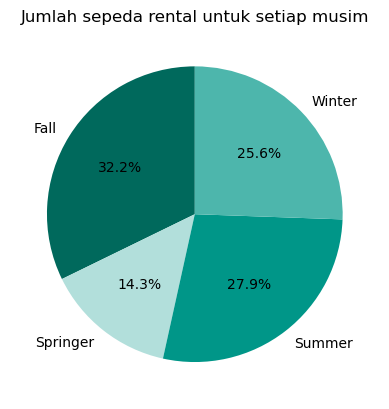

In [97]:
labels = ['Fall', 'Springer', 'Summer', 'Winter']
colors = ['#00695C', '#B2DFDB', '#009688', '#4DB6AC']
plt.pie(
    season_df['cnt'], 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=colors
)
plt.title('Jumlah sepeda rental untuk setiap musim')
plt.show()

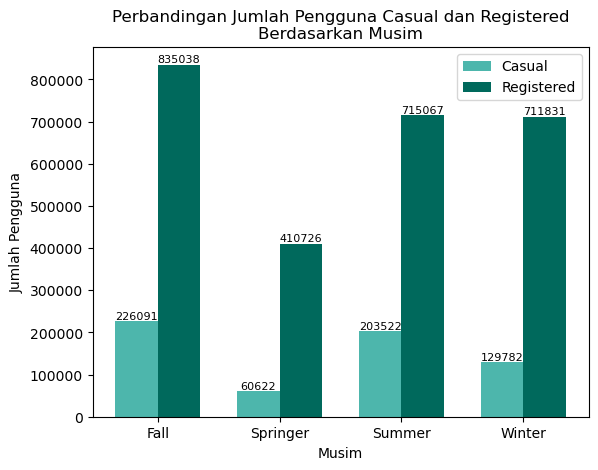

In [98]:
fig, ax = plt.subplots()
x = np.arange(len(season_df['casual']))  # Mengatur posisi bar
width = 0.35  # Lebar bar

# Mengatur bar plot pertama
bar1_plot = ax.bar(x - width/2, season_df['casual'], width, label='Casual', color='#4DB6AC')

# Mengatur bar plot kedua
bar2_plot = ax.bar(x + width/2, season_df['registered'], width, label='Registered', color='#00695C')

# Menambahkan nilai pada setiap bar plot
for bar, data in zip([bar1_plot, bar2_plot], [season_df['casual'], season_df['registered']]):
    for i, val in enumerate(data):
        ax.text(bar[i].get_x() + bar[i].get_width()/2, val,
                str(val), ha='center', va='bottom', fontsize=8)

# Menambahkan label, judul, dan legend
ax.set_xlabel('Musim')
ax.set_ylabel('Jumlah Pengguna')
ax.set_title('Perbandingan Jumlah Pengguna Casual dan Registered\nBerdasarkan Musim')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Pertanyaan 2: Bagaimana performa rental sepeda pada hari libur dan hari kerja?

In [100]:
working_mapping = {
    0: 'Hari Libur',
    1: 'Hari Kerja'
}

# Mengganti nilai dalam kolom 'season' dengan nama musim menggunakan mapping
hour_df['workingday'] = hour_df['workingday'].replace(working_mapping)

working_df = hour_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

In [101]:
working_df

,casual,registered,cnt
workingday,,,
Hari Kerja,303285,1989125,2292410
Hari Libur,316732,683537,1000269


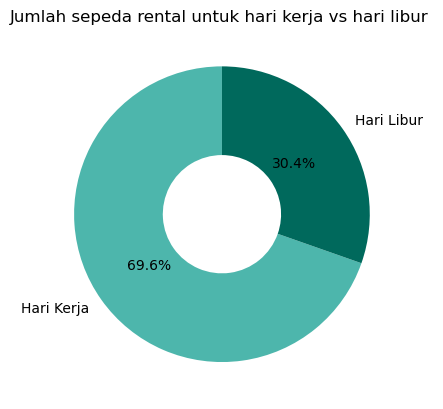

In [102]:
labels = ['Hari Kerja', 'Hari Libur']
colors = ['#4DB6AC', '#00695C']
plt.pie(
    working_df['cnt'], 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=colors, 
    wedgeprops = {'width':0.6}
)
plt.title('Jumlah sepeda rental untuk hari kerja vs hari libur ')
plt.show()

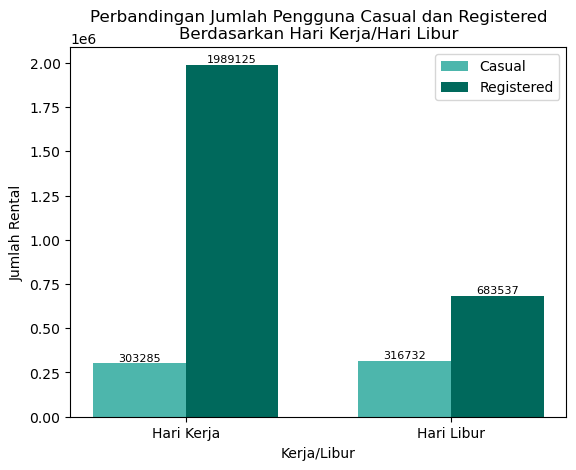

In [103]:
fig, ax = plt.subplots()
x = np.arange(len(working_df['casual']))  # Mengatur posisi bar
width = 0.35  # Lebar bar

# Mengatur bar plot pertama
bar1_plot = ax.bar(x - width/2, working_df['casual'], width, label='Casual', color='#4DB6AC')

# Mengatur bar plot kedua
bar2_plot = ax.bar(x + width/2, working_df['registered'], width, label='Registered', color='#00695C')

# Menambahkan nilai pada setiap bar plot
for bar, data in zip([bar1_plot, bar2_plot], [working_df['casual'], working_df['registered']]):
    for i, val in enumerate(data):
        ax.text(bar[i].get_x() + bar[i].get_width()/2, val,
                str(val), ha='center', va='bottom', fontsize=8)

# Menambahkan label, judul, dan legend
ax.set_xlabel('Kerja/Libur')
ax.set_ylabel('Jumlah Rental')
ax.set_title('Perbandingan Jumlah Pengguna Casual dan Registered\nBerdasarkan Hari Kerja/Hari Libur')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Pertanyaan 3: Berapa perbandingan jumlah rental dari casual users dan registered users di tahun 2011 dan 2012?

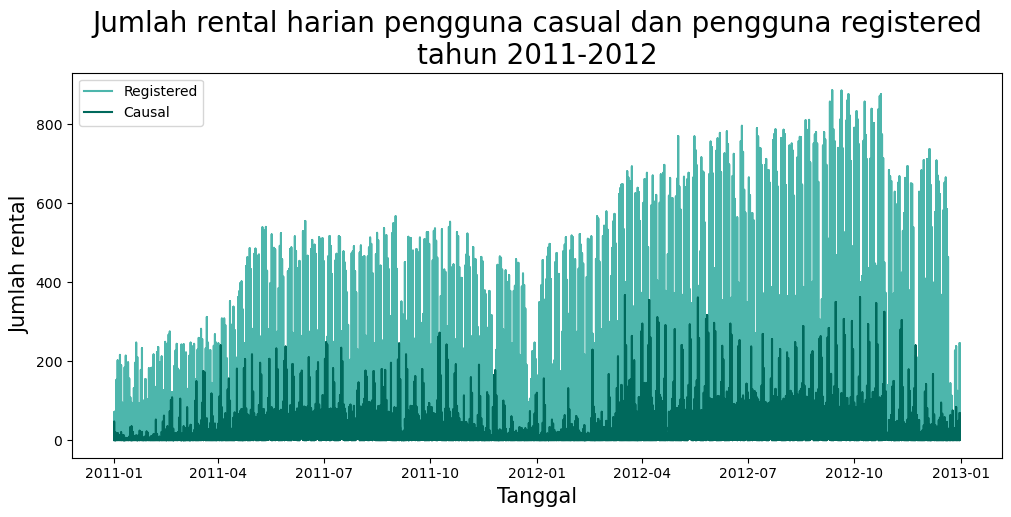

In [126]:
plt.figure(figsize=(12, 5))
plt.plot(hour_df['dteday'], hour_df['registered'], label='Registered', color='#4DB6AC')
plt.plot(hour_df['dteday'], hour_df['casual'], label='Causal', color='#00695C')
plt.title('Jumlah rental harian pengguna casual dan pengguna registered\ntahun 2011-2012', size=20)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Jumlah rental',size=15)
plt.legend()
plt.show()

In [108]:
year_mapping = {
    0: '2011',
    1: '2012'
}

# Mengganti nilai dalam kolom 'season' dengan nama musim menggunakan mapping
hour_df['yr'] = hour_df['yr'].replace(year_mapping)

userPerYear_df = hour_df.groupby(by=['yr', 'mnth']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
userPerYear_df

casual  registered     cnt
yr   mnth                            
2011 1       3073       35116   38189
     2       6242       41973   48215
     3      12826       51219   64045
     4      22346       72524   94870
     5      31050      104771  135821
     6      30612      112900  143512
     7      36452      104889  141341
     8      28842      107849  136691
     9      26545      100873  127418
     10     25222       98289  123511
     11     15594       86573  102167
     12      8448       78875   87323
2012 1       8969       87775   96744
     2       8721       94416  103137
     3      31618      133257  164875
     4      38456      135768  174224
     5      44235      151630  195865
     6      43294      159536  202830
     7      41705      161902  203607
     8      43197      171306  214503
     9      43778      174795  218573
     10     34538      164303  198841
     11     21009      131655  152664
     12     13245      110468  123713

In [109]:
year_df = hour_df.groupby(by=['yr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
year_df

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


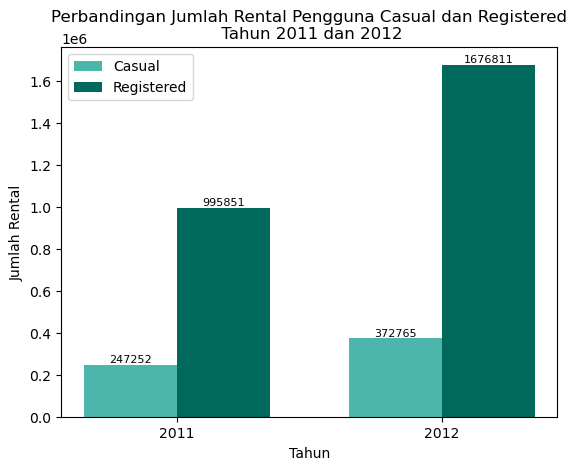

In [110]:
labels = ['2011', '2012']
fig, ax = plt.subplots()
x = np.arange(len( year_df['casual']))  # Mengatur posisi bar
width = 0.35  # Lebar bar

# Mengatur bar plot pertama
bar1_plot = ax.bar(x - width/2,  year_df['casual'], width, label='Casual', color='#4DB6AC')

# Mengatur bar plot kedua
bar2_plot = ax.bar(x + width/2,  year_df['registered'], width, label='Registered', color='#00695C')

# Menambahkan nilai pada setiap bar plot
for bar, data in zip([bar1_plot, bar2_plot], [ year_df['casual'],  year_df['registered']]):
    for i, val in enumerate(data):
        ax.text(bar[i].get_x() + bar[i].get_width()/2, val,
                str(val), ha='center', va='bottom', fontsize=8)

# Menambahkan label, judul, dan legend
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Rental')
ax.set_title('Perbandingan Jumlah Rental Pengguna Casual dan Registered\n Tahun 2011 dan 2012')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Pertanyaan 4: Di hari apa jumlah sepeda paling banyak dirental?

In [111]:
weekday_df = hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="weekday")
weekday_df

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


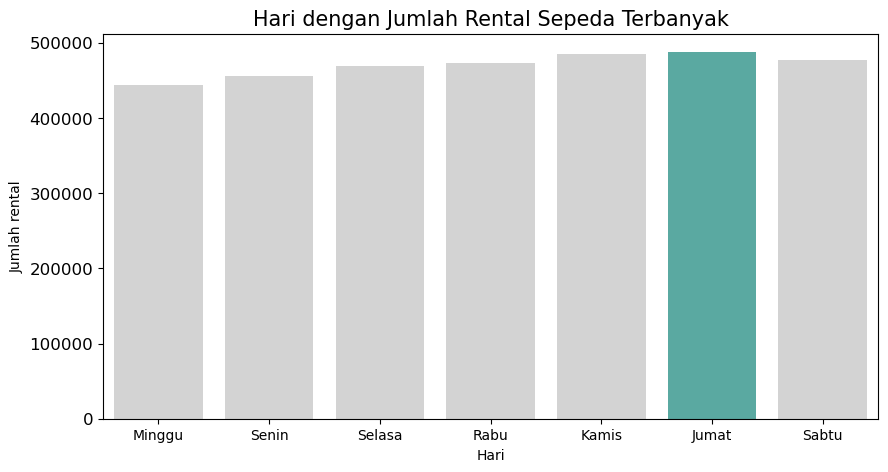

In [112]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#4DB6AC", "#D3D3D3"]
nama_hari = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}
sns.barplot(
    x=weekday_df.index.map(nama_hari), 
    y='cnt',
    data=weekday_df,
    palette=colors_
)

plt.title("Hari dengan Jumlah Rental Sepeda Terbanyak", loc="center", fontsize=15)
plt.ylabel('Jumlah rental')
plt.xlabel('Hari')
plt.tick_params(axis='y', labelsize=12)
plt.show()

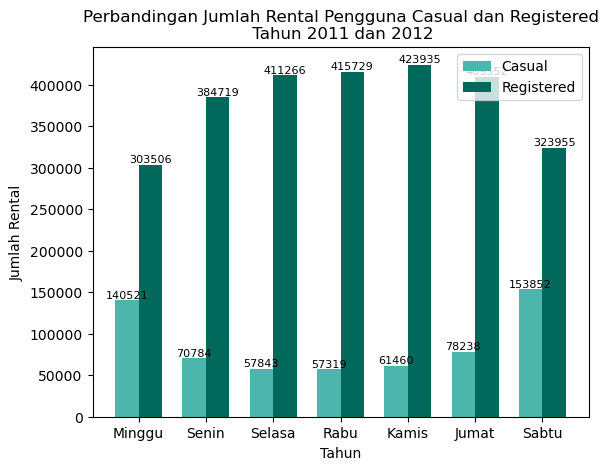

In [113]:
# plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
x = np.arange(len( weekday_df['casual']))  # Mengatur posisi bar
width = 0.35  # Lebar bar

# Mengatur bar plot pertama
bar1_plot = ax.bar(x - width/2,  weekday_df['casual'], width, label='Casual', color='#4DB6AC')

# Mengatur bar plot kedua
bar2_plot = ax.bar(x + width/2,  weekday_df['registered'], width, label='Registered', color='#00695C')

# Menambahkan nilai pada setiap bar plot
for bar, data in zip([bar1_plot, bar2_plot], [ weekday_df['casual'],  weekday_df['registered']]):
    for i, val in enumerate(data):
        ax.text(bar[i].get_x() + bar[i].get_width()/2, val,
                str(val), ha='center', va='bottom', fontsize=8)

# Menambahkan label, judul, dan legend
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Rental')
ax.set_title('Perbandingan Jumlah Rental Pengguna Casual dan Registered\n Tahun 2011 dan 2012')
ax.set_xticks(x)
ax.set_xticklabels(weekday_df.index.map(nama_hari))
ax.legend()

plt.show()

### Pertanyaan 5: Di jam berapakah sepeda paling banyak dan paling sedikit dirental?

In [114]:
hr_df = hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)
hr_df.head()

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789


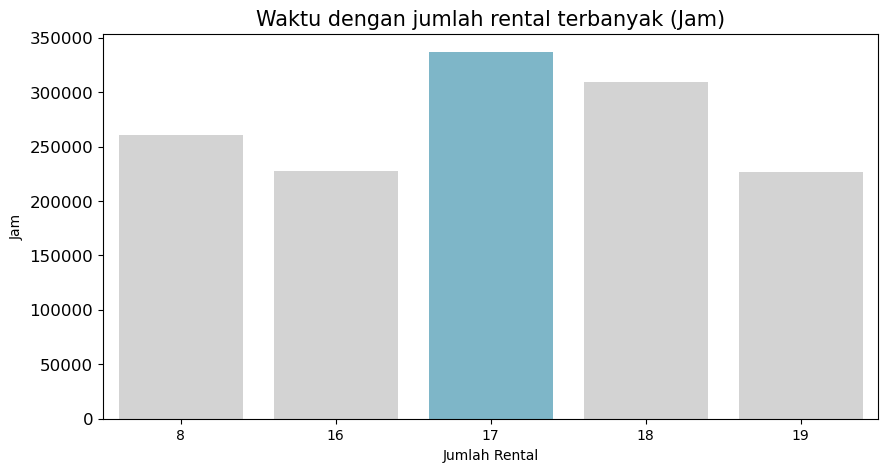

In [115]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

# Menyortir DataFrame dan mengambil lima data teratas
top_5_hour_df = hr_df.head()

sns.barplot(
    x=top_5_hour_df.index, 
    y="cnt",
    data=top_5_hour_df,
    palette=colors_
)
plt.title("Waktu dengan jumlah rental terbanyak (Jam)", loc="center", fontsize=15)
plt.ylabel('Jam')
plt.xlabel('Jumlah Rental')
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [116]:
hr_df = hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=True)
hr_df.head()

,casual,registered,cnt
hr,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164


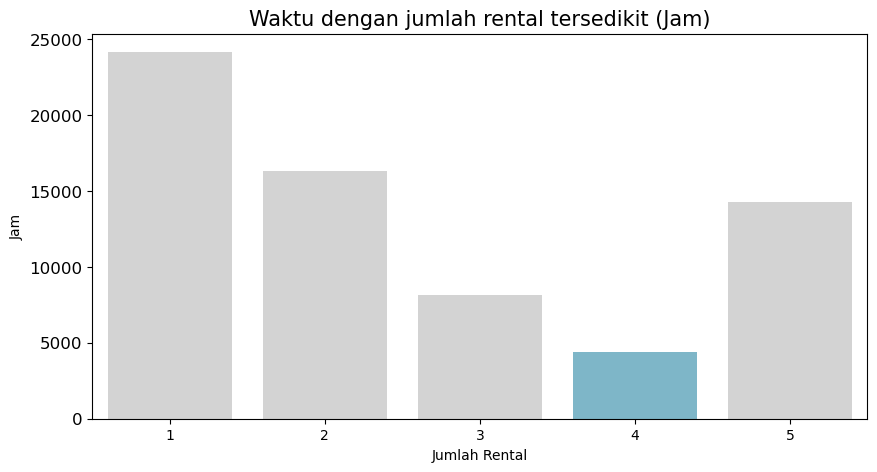

In [117]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Menyortir DataFrame dan mengambil lima data teratas
bottom_5_hour_df = hr_df.head()

sns.barplot(
    x=bottom_5_hour_df.index, 
    y="cnt",
    data=bottom_5_hour_df,
    palette=colors_
)
plt.title("Waktu dengan jumlah rental tersedikit (Jam)", loc="center", fontsize=15)
plt.ylabel('Jam')
plt.xlabel('Jumlah Rental')
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 6 : Bagaimana pengaruh suhu terhadap jumlah rental sepeda?

In [118]:
temp_df = hour_df.groupby(by='temp').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt")
temp_df

,casual,registered,cnt
temp,,,
1.00,102,192,294
0.08,33,447,480
0.98,82,457,539
0.04,28,542,570
0.06,44,628,672
0.02,16,696,712
0.10,85,2429,2514
0.94,1020,2670,3690
0.96,1063,3329,4392


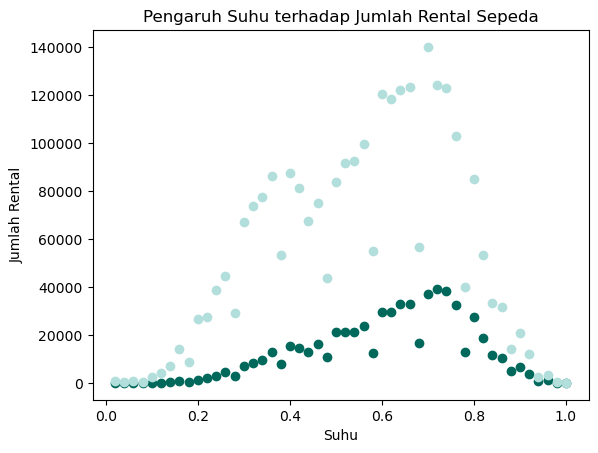

In [119]:
plt.scatter(x=temp_df.index, y=temp_df["casual"], color='#00695C')
plt.scatter(x=temp_df.index, y=temp_df["registered"], color='#B2DFDB')
plt.title('Pengaruh Suhu terhadap Jumlah Rental Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Rental')
plt.show()

###  Pertanyaan 7 :  Bagaimana pengaruh kelembapan terhadap jumlah rental sepeda?

In [120]:
hum_df = hour_df.groupby(by='hum').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt")
hum_df

,casual,registered,cnt
hum,,,
0.13,3,14,17
0.12,6,23,29
0.14,10,28,38
0.97,18,46,64
0.08,16,61,77
...,...,...,...
0.62,15164,60961,76125
0.66,15821,61099,76920
0.46,16576,62677,79253


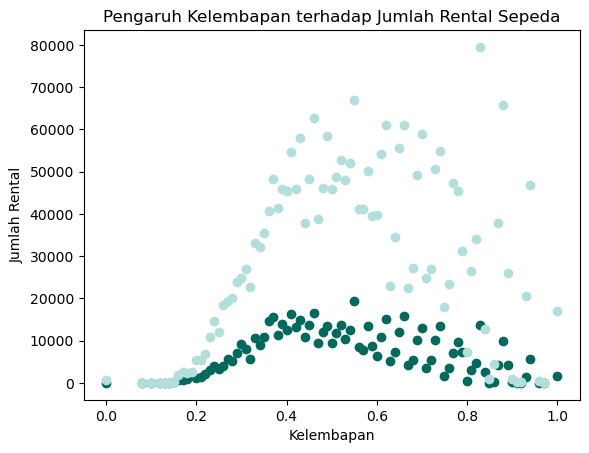

In [121]:
plt.scatter(x=hum_df.index, y=hum_df["casual"], color='#00695C')
plt.scatter(x=hum_df.index, y=hum_df["registered"], color='#B2DFDB')
plt.title('Pengaruh Kelembapan terhadap Jumlah Rental Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Rental')
plt.show()

### Pertanyaan 8 : Bagaimaan pengaruh kecepatan angin terhadap jumlah rental sepeda?

In [122]:
windspeed_df = hour_df.groupby(by='windspeed').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt")
windspeed_df

,casual,registered,cnt
windspeed,,,
0.7761,0,5,5
0.8358,2,14,16
0.8060,6,201,207
0.7164,94,187,281
0.7463,92,268,360
0.8507,255,284,539
0.6866,114,475,589
0.6418,366,1669,2035
0.6567,320,1792,2112


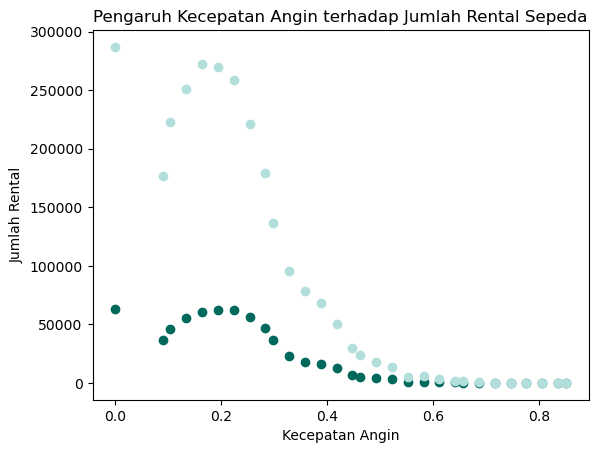

In [123]:
plt.scatter(x=windspeed_df.index, y=windspeed_df["casual"], color='#00695C')
plt.scatter(x=windspeed_df.index, y=windspeed_df["registered"], color='#B2DFDB')
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Rental Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Rental')
plt.show()

In [124]:
hour_df.to_csv("hour_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: Musim yang paling banyak rental sepeda yaitu Musim Gugur (Fall) sebanyak 32,2% atau 1.061.129 rental sepeda. Disusul Summer, Winter, dan Springer.
- Conclution pertanyaan 2: Jumlah rental sepeda pada hari kerja lebih banyak dibandingkan dengan hari libur. Adapun jumlah rental sepeda pada hari kerja sebanyak 69,6% atau 2.292.410 rental sepeda.
- Conclution pertanyaan 3: Tahun 2012 mmiliki peningkatan jumlah rental sepeda dibandingkan tahun 2011, baik dari pengguna casual atau registered.
- Condlution pertanyaan 4: Jumlah rental sepeda paling banyak terjadi di hari Jumat dengan total sebanyak 487.790 rental sepeda.
- Conclution pertanyaan 5: Sepeda paling banyak di rental pada jam 17.00 sebanyak 336.860 rental sepeda. Sementara itu sepeda paling sedikit dirental pada jam 04.00 sebanyak 4.428 rental sepeda.
- Conclution pertanyaan 6: Suhu memiliki pengaruh yang lebih besar terhadap jumlah rental pengguna registered dibandingkan dengan jumlah rental pengguna casual. Adapun ukuran suhu dengan jumlah rental terbanyak berada di kisaran 20,5-28,7 derajat celcius (0,5-0,7). Grafik yang ditampilkan menunjukkan bentuk left-skewed distribution.
- Conclution pertanyaan 7: Kelembapan memiliki pengaruh yang lebih besar terhadap jumlah rental pengguna registered dibandingkan dengan jumlah rental pengguna casual. Adapun ukuran kelembapan dengan jumlah rental terbanyak berada di kisaran 50-70 ppm (0,5-0,7). Grafik yang ditampilkan menunjukkan bentuk symmetric distribution.
- Conclution pertanyaan 8: Kecepatan angin memiliki pengaruh yang lebih besar terhadap jumlah rental pengguna registered dibandingkan dengan jumlah rental pengguna casual. Adapun ukuran kecepatan angin dengan jumlah rental terbanyak berada di kisaran 6,7-13,4 km/jam (0,1-0,2). Grafik yang ditampilkan menunjukkan bentuk right-skewed distribution.
